# 1. Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 2. Analisando dados dos Influencer

In [2]:
path = "../data/influencer_data/"

csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df_influencer   = pd.concat(df_list, ignore_index=True)

In [4]:
c=['userID', 'seguidores', 'twwets']
df_influencer[c].head()

,userID,seguidores,twwets
0,Cellbit,5976407,3857
1,Loiranoob,1755512,106251
2,BRKsEDU,1616770,773
3,Cellbit,5976487,3858
4,Loiranoob,1754974,106262


In [4]:
df_influencer.shape

(18, 5)

In [5]:
df_distinct = df_influencer.drop_duplicates(subset=['data_ref', 'userID'])
print(df_distinct.shape)
df_grouped = df_distinct.groupby(['userID', 'data_ref']).agg({'seguidores': 'sum'}).reset_index()

(18, 5)


In [6]:
df_grouped

,userID,data_ref,seguidores
0,BRKsEDU,2023-04-15,1616225
1,BRKsEDU,2023-04-16,1616180
2,BRKsEDU,2023-04-19,1616504
3,BRKsEDU,2023-04-20,1616502
4,BRKsEDU,2023-04-24,1616770
5,BRKsEDU,2023-04-26,1616495
6,Cellbit,2023-04-15,5976402
7,Cellbit,2023-04-16,5976471
8,Cellbit,2023-04-19,5976407
9,Cellbit,2023-04-20,5976366


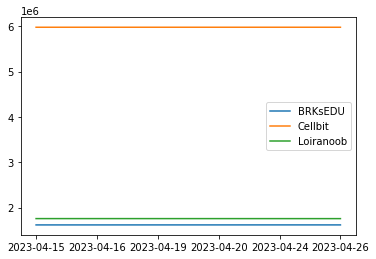

In [7]:
for user in df_grouped['userID'].unique():
    df_user = df_grouped[df_grouped['userID'] == user]
    plt.plot(df_user['data_ref'], df_user['seguidores'], label=user)

plt.legend()
plt.show()

## No curto Prazo a quantidade de Seguidores se mantem constante.